# MTSU Computational Science
## Research Experience for Undergraduates

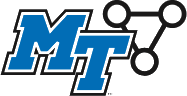

### Python Bootcamp - Module 3-A
#### Intro to Signal Processing

In [1]:
# from __future__ import division
import scipy.constants as const
import scipy
from scipy.io import wavfile
from IPython.core.display import HTML
import librosa
%matplotlib inline

In [2]:
# this is a wrapper that takes a filename and publish an html <audio> tag to listen to it

def wavPlayer(filepath):
    """ will display html 5 player for compatible browser

    Parameters :
    ------------
    filepath : relative filepath with respect to the notebook directory ( where the .ipynb are not cwd)
               of the file to play

    The browser need to know how to play wav through html5.

    there is no autoplay to prevent file playing when the browser opens
    """
    
    src = """
    <head>
    <meta http-equiv="Content-Type" content="text/html; charset=utf-8">
    <title>Simple Test</title>
    </head>
    
    <body>
    <audio controls="controls" style="width:600px" >
      <source src="%s" type="audio/wav" />
      Your browser does not support the audio element.
    </audio>
    </body>
    """%(filepath)
    display(HTML(src))

In [3]:
# define A as a 440 Hz sin function 
#la    = lambda t : normedsin(440,t)

# look at it on the first 25 ms
#plot(time[0:1000], la(time)[0:1000])

# write the file on disk, and show in in a Html 5 audio player
# wavfile.write('440.wav', rate, la(time).astype(np.int16))
wavPlayer("testsound.wav")

In [5]:
y, sr = librosa.load("testsound.wav",sr=8000)

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

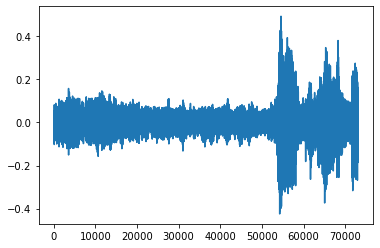

In [7]:
plt.plot(range(len(y)),y)
plt.show()

In [8]:
import numpy as np

In [9]:
yfft = np.fft.fft(y[0:64])

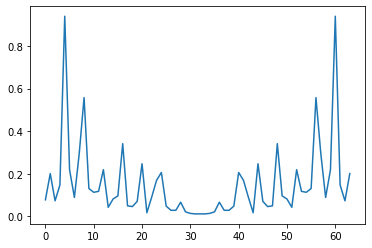

In [10]:
plt.plot(range(len(y[0:64])),np.abs(yfft))
plt.show()

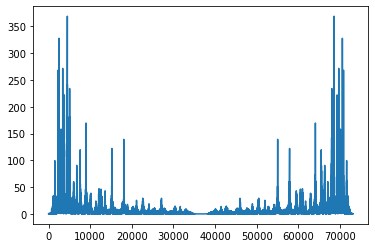

In [11]:
plt.plot(range(len(y)),np.abs(np.fft.fft(y)))
plt.show()

In [12]:
len(y)

73130

Make a choice of filter below, and run just that one cell before plotting/saving/playing the filtered data.

Highpass, lowpass, and volume adjustment are provided. However, there is an auto normalization performed by most sound libraries such that the volume adjustment is moot.

In [13]:
myfilter = np.ones(len(y))

# Lowpass
filter_length = 60000
begin = int((len(y)-filter_length) / 2)
end = int(len(y)-((len(y)-filter_length) / 2))
myfilter[range(begin,end)] = 0.0

In [14]:
myfilter = np.ones(len(y))

# Highpass
filter_length = 10000
myfilter[range(filter_length)] = 0.0
myfilter[range(len(y)-filter_length,len(y))] = 0

In [15]:
myfilter = np.ones(len(y))

# Volume - doesn't work since players/cards autonormalize
myfilter[0] *= 100000.0

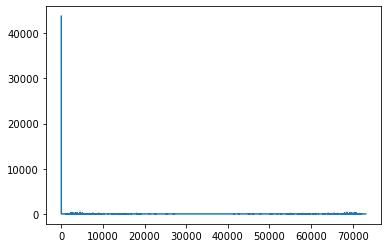

In [16]:
plt.plot(range(len(y)),np.abs(np.fft.fft(y))*myfilter)
plt.show()

In [17]:
wavfile.write('processed.wav', sr, np.float32(np.real(np.fft.ifft(np.fft.fft(y)*myfilter))))
wavPlayer("processed.wav")